# 1. BUSINESS UNDERSTANDING

Dalam sektor pariwisata, data terkait jumlah kunjungan wisatawan mancanegara merupakan salah satu indikator utama untuk mengukur kinerja dan perkembangan industri ini. Informasi tersebut tidak hanya berguna untuk mengetahui tren kunjungan wisatawan, tetapi juga penting bagi perencanaan strategis, promosi, serta alokasi sumber daya oleh pemerintah dan pelaku industri pariwisata.


Proyek ini bertujuan untuk memprediksi jumlah kunjungan wisatawan mancanegara berdasarkan pintu masuk ke Indonesia, baik melalui jalur udara (bandara), laut (pelabuhan), maupun darat (perbatasan atau pos lintas batas). Dengan menggunakan data dari tahun 2010 hingga 2019 serta tahun 2023 hingga 2024, proyek ini secara khusus ingin menganalisis dan membandingkan perbedaan pola kunjungan sebelum pandemi COVID-19 dan setelah pandemi. Data dari tahun 2020 hingga 2022 dikecualikan karena periode tersebut dianggap tidak representatif akibat pembatasan perjalanan global.


**Tujuan**:
- Memprediksi jumlah kunjungan wisatawan pada tiap pintu masuk di Indonesia.

- Menganalisis perubahan jumlah kunjungan sebelum dan sesudah pandemi.

- Memberikan gambaran visual dan numerik terhadap tren kunjungan wisatawan pada periode tertentu.


**Manfaat**:
- Bagi pemerintah: sebagai dasar evaluasi dan perencanaan kebijakan pariwisata pascapandemi.

- Bagi sektor industri: untuk mengidentifikasi peluang pasar dan perbaikan strategi pemasaran pariwisata.

- Bagi peneliti dan akademisi: sebagai studi kasus penerapan machine learning dalam bidang pariwisata.

# 2. DATA UNDERSTANDING

## 2.1 Sumber Data


Dataset ini diperoleh dari:

[BPS – Jumlah Kunjungan Wisatawan Mancanegara per Bulan](https://www.bps.go.id/id/statistics-table/2/MTE1MCMy/jumlah-kunjungan-wisatawan-mancanegara-per-bulan-ke-indonesia-menurut-pintu-masuk--2008---sekarang--kunjungan-.html)

## 2.2 Deskripsi Data

Dataset ini berisi data jumlah kunjungan wisatawan mancanegara ke Indonesia berdasarkan pintu masuk dan tanggal kunjungan. Rentang waktu yang digunakan dalam penelitian adalah:

- 2010–2019: Pra-COVID

- 2023–2024: Pasca-COVID

- 2020–2022 tidak digunakan karena masa pandemi.

## 2.3 Struktur Kolom


- Tanggal: Tanggal kunjungan (format: YYYY-MM-DD)

- Pintu Masuk: Nama lokasi pintu masuk (misalnya bandara, pelabuhan, perbatasan)

- Jumlah Kunjungan: Jumlah wisatawan yang tercatat masuk melalui pintu tersebut

## 2.4 Karakter Khusus


1. Terdapat entri ringkasan seperti:

- "A. Pintu Udara", "B. Pintu Laut", "C. Pintu Darat" → agregat grup

- "Jumlah (A + B + C)", "Total" → total keseluruhan

2. Nilai agregat ini perlu dihapus karena akan mengganggu akurasi model prediksi.

# 3. DATA PREPARATION


## 3.1 DATA COLLECTION


Dataset yang digunakan diambil dari :

[BPS – Jumlah Kunjungan Wisatawan Mancanegara per Bulan](https://www.bps.go.id/id/statistics-table/2/MTE1MCMy/jumlah-kunjungan-wisatawan-mancanegara-per-bulan-ke-indonesia-menurut-pintu-masuk--2008---sekarang--kunjungan-.html)

Lalu datasetnya di download melalui fitur "Unduh" pada tampilan website BPS tersebut. Dataset yang diambil mulai dari tahun 2010 sampai 2019, lalu tahun 2023 sampai 2024.
*{Jelasin mengapa tahun 2020 sampai tahun 2022 tidak dimasukkan}*

In [1]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Datetime Processing
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 3.2 DATA CLEANING

Data yang sudah didownload daei website dari tahun 2010 - 2024 akan diolah pada Data Cleaning ini.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2010.csv to Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2010.csv
Saving Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2011.csv to Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2011.csv
Saving Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2012.csv to Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2012.csv
Saving Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2013.csv to Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2013.csv
Saving Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk

In [ ]:
import pandas as pd

# Ganti dengan nama file yang kamu upload
csv_path = '/content/Jumlah Kunjungan Wisatawan Mancanegara per bulan ke Indonesia Menurut Pintu Masuk, 2008 - sekarang, 2024.csv'
# Baca file
df = pd.read_csv(csv_path)

# Buang baris header tambahan (0-2)
df_clean = df.iloc[3:].reset_index(drop=True)

# Ambil nama bulan dari baris ke-2
bulan_list = df.iloc[2, 1:13].tolist()
tahun = int(df.iloc[1, 1])  # Tahun: 2019

# Ambil hanya kolom yang merepresentasikan data bulanan
data_bulanan = df_clean.iloc[:, [0] + list(range(1, 14))]

# Ganti nama kolom
kolom_baru = ['Pintu Masuk'] + bulan_list + ['Tahunan']
data_bulanan.columns = kolom_baru

# Reshape dari wide ke long format
data_long = pd.melt(data_bulanan,
                    id_vars=['Pintu Masuk'],
                    value_vars=bulan_list,
                    var_name='Bulan',
                    value_name='Jumlah Kunjungan')

# Tambahkan kolom tahun
data_long['Tahun'] = tahun

# Mapping nama bulan Indonesia ke Inggris
bulan_indo_to_en = {
    "Januari": "January", "Februari": "February", "Maret": "March",
    "April": "April", "Mei": "May", "Juni": "June",
    "Juli": "July", "Agustus": "August", "September": "September",
    "Oktober": "October", "November": "November", "Desember": "December"
}
data_long['Bulan_Eng'] = data_long['Bulan'].map(bulan_indo_to_en)

# Gabungkan menjadi kolom datetime
data_long['Tanggal'] = pd.to_datetime(data_long['Tahun'].astype(str) + '-' + data_long['Bulan_Eng'], format='%Y-%B')

# Ubah jumlah kunjungan ke numerik
data_long['Jumlah Kunjungan'] = pd.to_numeric(data_long['Jumlah Kunjungan'], errors='coerce')

# Ambil kolom final
data_long_final = data_long[['Tanggal', 'Pintu Masuk', 'Jumlah Kunjungan']].sort_values('Tanggal').reset_index(drop=True)

# Tampilkan contoh hasil
data_long_final.head()

# Simpan dataset hasil pembersihan
data_long_final.to_csv('jumlah_kunjungan_wisman_rapi_2024.csv', index=False)

## 3.3 DATA INTEGRATION

In [ ]:
import pandas as pd

# Daftar file CSV yang benar sesuai nama file upload
file_list = [
    "jumlah_kunjungan_wisman_rapi_2010.csv",
    "jumlah_kunjungan_wisman_rapi_2011.csv",
    "jumlah_kunjungan_wisman_rapi_2012.csv",
    "jumlah_kunjungan_wisman_rapi_2013.csv",
    "jumlah_kunjungan_wisman_rapi_2014.csv",
    "jumlah_kunjungan_wisman_rapi_2015.csv",
    "jumlah_kunjungan_wisman_rapi_2016.csv",
    "jumlah_kunjungan_wisman_rapi_2017.csv",
    "jumlah_kunjungan_wisman_rapi_2018.csv",
    "jumlah_kunjungan_wisman_rapi_2019.csv",
    "jumlah_kunjungan_wisman_rapi_2023.csv",
    "jumlah_kunjungan_wisman_rapi_2024.csv"

]

# Baca dan gabungkan semuanya
df_list = [pd.read_csv(file) for file in file_list]
df_all = pd.concat(df_list, ignore_index=True)

# Pastikan kolom 'Tanggal' dalam format datetime
df_all['Tanggal'] = pd.to_datetime(df_all['Tanggal'])

# Urutkan berdasarkan tanggal
df_all = df_all.sort_values('Tanggal').reset_index(drop=True)

# Tampilkan hasil gabungan
df_all.head()

,Tanggal,Pintu Masuk,Jumlah Kunjungan
0,2010-01-01,A. Pintu Udara,340049.0
1,2010-01-01,Soekarno-Hatta,117422.0
2,2010-01-01,Juanda,13889.0
3,2010-01-01,Kualanamu,11365.0
4,2010-01-01,Husein Sastranegara,6444.0


In [ ]:
# Simpan ke file CSV baru
df_all.to_csv("jumlah_kunjungan_wisman_2010_2024.csv", index=False)

# Unduh ke komputermu
files.download("jumlah_kunjungan_wisman_2010_2024.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 3.4 DATA TRANSFORMATION

**Tujuan**:

Melakukan pembersihan, pelabelan, dan penyusunan ulang dataset agar siap digunakan untuk analisis dan pelatihan model prediksi.

Statistik Dataset:
- Jumlah total baris: 4.464

- Jumlah nilai 0 (jumlah_kunjungan): 1.072

- Jumlah nilai NaN tersisa: 288

In [2]:
# Memuat dataset
df = pd.read_csv('/content/jumlah_kunjungan_wisman_2010_2024.csv')

# Menampilkan 5 baris pertama dataset
df.head()

,Tanggal,Pintu Masuk,Jumlah Kunjungan
0,2010-01-01,A. Pintu Udara,340049.0
1,2010-01-01,Soekarno-Hatta,117422.0
2,2010-01-01,Juanda,13889.0
3,2010-01-01,Kualanamu,11365.0
4,2010-01-01,Husein Sastranegara,6444.0


In [ ]:
print(df.columns.tolist())

['Tanggal', 'Pintu Masuk', 'Jumlah Kunjungan']


In [ ]:
# Info struktur dataset
print("\n🔍 Info Dataset:")
df.info()

# Cek missing value
print("\n🧼 Missing Value per Kolom:")
print(df.isnull().sum())

# Tampilkan nama kolom
print("\n📦 Kolom-kolom yang tersedia:")
print(df.columns)


🔍 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tanggal           5040 non-null   object 
 1   Pintu Masuk       5040 non-null   object 
 2   Jumlah Kunjungan  4057 non-null   float64
dtypes: float64(1), object(2)
memory usage: 118.3+ KB

🧼 Missing Value per Kolom:
Tanggal               0
Pintu Masuk           0
Jumlah Kunjungan    983
dtype: int64

📦 Kolom-kolom yang tersedia:
Index(['Tanggal', 'Pintu Masuk', 'Jumlah Kunjungan'], dtype='object')


In [3]:
import pandas as pd

# =====================
# 1️⃣ Load Dataset
# =====================
df = pd.read_csv("/content/jumlah_kunjungan_wisman_2010_2024.csv")

# =====================
# 2️⃣ Normalisasi Kolom
# =====================
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['tanggal'] = pd.to_datetime(df['tanggal'])
df['jumlah_kunjungan'] = pd.to_numeric(df['jumlah_kunjungan'], errors='coerce')

# =====================
# 3️⃣ Hapus Baris Agregat
# =====================
baris_agregat = [
    'A. Pintu Udara',
    'B. Pintu Laut',
    'C. Pintu Darat',
    'Jumlah (A+B+C)',
    'Lainnya',
    'Total'
]
df = df[~df['pintu_masuk'].isin(baris_agregat)].reset_index(drop=True)

# =====================
# 4️⃣ Mapping Grup Pintu
# =====================
grup_mapping = {
    # Pintu Udara
    'Ngurah Rai': 'Udara', 'Soekarno-Hatta': 'Udara', 'Juanda': 'Udara',
    'Kualanamu': 'Udara', 'Husein Sastranegara': 'Udara', 'Adi Sucipto': 'Udara',
    'Bandara Int. Lombok': 'Udara', 'Sam Ratulangi': 'Udara', 'Minangkabau': 'Udara',
    'Sultan Syarif Kasim II': 'Udara', 'Sultan Iskandar Muda': 'Udara',
    'Ahmad Yani': 'Udara', 'Supadio': 'Udara', 'Hasanuddin': 'Udara',
    'Sultan Badaruddin II': 'Udara', 'Pintu Udara Lainnya': 'Udara',

    # Pintu Laut
    'Batam': 'Laut', 'Tanjung Uban': 'Laut', 'Tanjung Pinang': 'Laut',
    'Tanjung Balai Karimun': 'Laut', 'Tanjung Benoa': 'Laut', 'Tanjung Mas': 'Laut',
    'Pintu Laut Lainnya': 'Laut',

    # Pintu Darat
    'Jayapura': 'Darat', 'Atambua': 'Darat', 'Entikong': 'Darat',
    'Aruk': 'Darat', 'Nanga Badau': 'Darat', 'Pintu Darat Lainnya': 'Darat',
}

df['grup_pintu'] = df['pintu_masuk'].map(grup_mapping)

# =====================
# 5️⃣ Lengkapi Kombinasi Tanggal × Pintu Masuk
# =====================
tanggal_unik = df['tanggal'].sort_values().unique()
pintu_unik = df['pintu_masuk'].unique()
full_index = pd.MultiIndex.from_product([tanggal_unik, pintu_unik], names=['tanggal', 'pintu_masuk'])
df_full = pd.DataFrame(index=full_index).reset_index()

df_clean = pd.merge(df_full, df, on=['tanggal', 'pintu_masuk'], how='left')

# =====================
# 6️⃣ Isi Nilai Kosong
# =====================
df_clean['grup_pintu'] = df_clean['grup_pintu'].fillna(df_clean['pintu_masuk'].map(grup_mapping))
df_clean['jumlah_kunjungan'] = df_clean['jumlah_kunjungan'].fillna(0)

# =====================
# 7️⃣ Hapus Lagi Baris Agregat (Antisipasi)
# =====================
df_clean = df_clean[~df_clean['pintu_masuk'].isin(baris_agregat)].reset_index(drop=True)

# =====================
# 8️⃣ Urutkan & Simpan
# =====================
df_clean = df_clean.sort_values(['pintu_masuk', 'tanggal']).reset_index(drop=True)

# Simpan CSV
output_file = 'data_normalisasi_Kunjungan_2010_2024.csv'
df_clean.to_csv(output_file, index=False)

print(f"✅ Data normalisasi berhasil disimpan sebagai '{output_file}'")
print(f"Jumlah total baris: {len(df_clean)}")
print(f"Jumlah nilai 0 (jumlah_kunjungan): {(df_clean['jumlah_kunjungan'] == 0).sum()}")
print(f"Jumlah nilai NaN tersisa: {df_clean.isna().sum().sum()}")


✅ Data normalisasi berhasil disimpan sebagai 'data_normalisasi_Kunjungan_2010_2024.csv'
Jumlah total baris: 4176
Jumlah nilai 0 (jumlah_kunjungan): 1012
Jumlah nilai NaN tersisa: 0


## 3.5 DATA REDUCTION


TIDAK PERLU DATA REDUCTION KARENA TIDAK ADA VOLUME DATA YANG BESAR


In [5]:
# 💾 Simpan data yang sudah dinormalisasi ke CSV
df_clean.to_csv('data_normalisasi_Kunjungan 2010 - 2024.csv', index=False)
print("✅ Data normalisasi berhasil disimpan sebagai 'data_normalisasi_Kunjungan 2010 - 2024.csv'")

✅ Data normalisasi berhasil disimpan sebagai 'data_normalisasi_Kunjungan 2010 - 2024.csv'


In [6]:
import pandas as pd

df = pd.read_csv("/content/data_normalisasi_Kunjungan 2010 - 2024.csv")

# atur supaya hanya sebagian baris ditampilkan (default pandas)
pd.set_option("display.max_rows", 10)

# tampilkan dataframe
print(df)

         tanggal   pintu_masuk  jumlah_kunjungan grup_pintu
0     2010-01-01   Adi Sucipto            3672.0      Udara
1     2010-02-01   Adi Sucipto            4006.0      Udara
2     2010-03-01   Adi Sucipto            4467.0      Udara
3     2010-04-01   Adi Sucipto            3733.0      Udara
4     2010-05-01   Adi Sucipto            5170.0      Udara
...          ...           ...               ...        ...
4171  2024-08-01  Tanjung Uban           20655.0       Laut
4172  2024-09-01  Tanjung Uban           16058.0       Laut
4173  2024-10-01  Tanjung Uban           15916.0       Laut
4174  2024-11-01  Tanjung Uban           14933.0       Laut
4175  2024-12-01  Tanjung Uban           22213.0       Laut

[4176 rows x 4 columns]


# 4. EXPLORATORY DATA ANALYSIS (EDA)

**Tujuan EDA**:

- Memahami distribusi data.

- Mengetahui tren kunjungan wisatawan dari waktu ke waktu.

- Melihat perbedaan pola antar pintu masuk dan grup pintu.

- Mengidentifikasi outlier atau anomali (jika ada).


**Analisis yang Umum Dilakukan di EDA Time Series**:

- Distribusi jumlah kunjungan wisatawan.

- Tren kunjungan secara keseluruhan per tahun.

- Tren per grup pintu (Udara, Laut, Darat).

- (Opsional) Heatmap atau boxplot musiman (bulanan per tahun).

## 4.1 Visualisasi

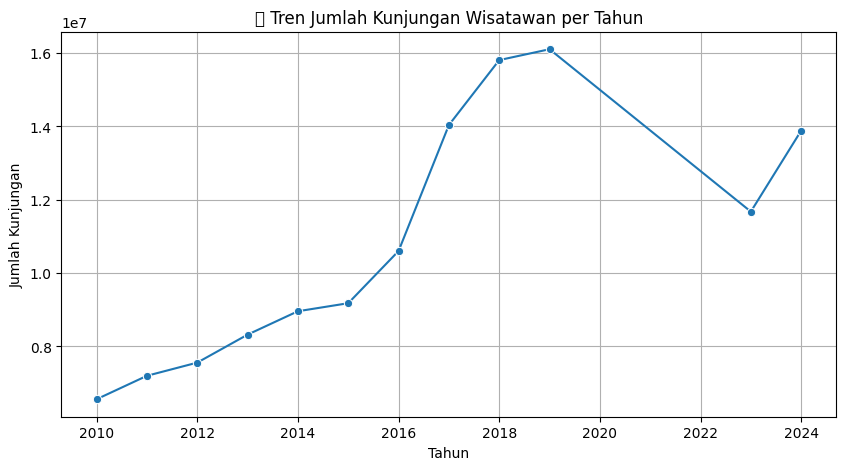

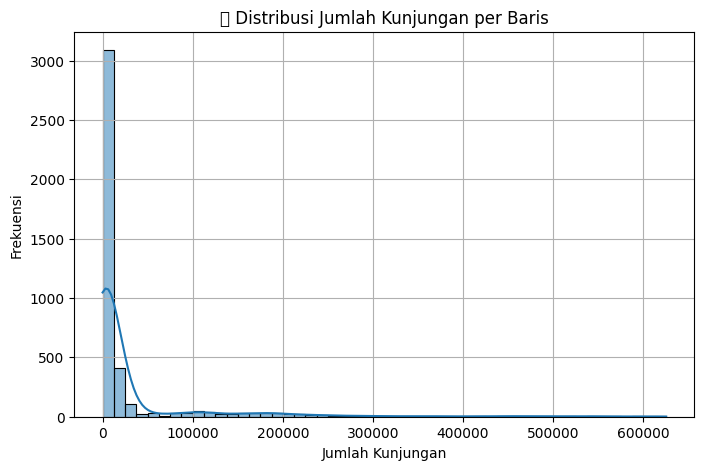

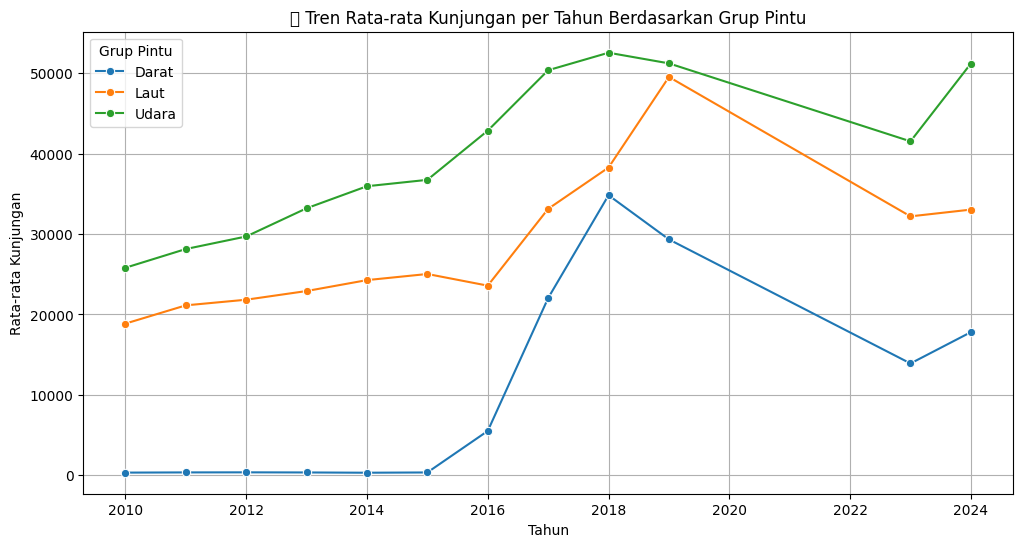

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom tanggal dalam format datetime
df_clean['tanggal'] = pd.to_datetime(df_clean['tanggal'])

# 🎯 Tren jumlah kunjungan keseluruhan dari tahun ke tahun
df_clean['tahun'] = df_clean['tanggal'].dt.year
df_clean['bulan'] = df_clean['tanggal'].dt.month

kunjungan_per_tahun = df_clean.groupby('tahun')['jumlah_kunjungan'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=kunjungan_per_tahun.index, y=kunjungan_per_tahun.values, marker='o')
plt.title("📈 Tren Jumlah Kunjungan Wisatawan per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kunjungan")
plt.grid(True)
plt.show()

# 📊 Distribusi jumlah kunjungan (histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['jumlah_kunjungan'], bins=50, kde=True)
plt.title("🔍 Distribusi Jumlah Kunjungan per Baris")
plt.xlabel("Jumlah Kunjungan")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# 📉 Tren rata-rata kunjungan bulanan per grup pintu
monthly_group = df_clean.groupby(['tahun', 'grup_pintu'])['jumlah_kunjungan'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_group, x='tahun', y='jumlah_kunjungan', hue='grup_pintu', marker='o')
plt.title("🚪 Tren Rata-rata Kunjungan per Tahun Berdasarkan Grup Pintu")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Kunjungan")
plt.grid(True)
plt.legend(title="Grup Pintu")
plt.show()


## 4.2 HEATMAP KORELASI

### 4.2.1 FITUR NUMERIK

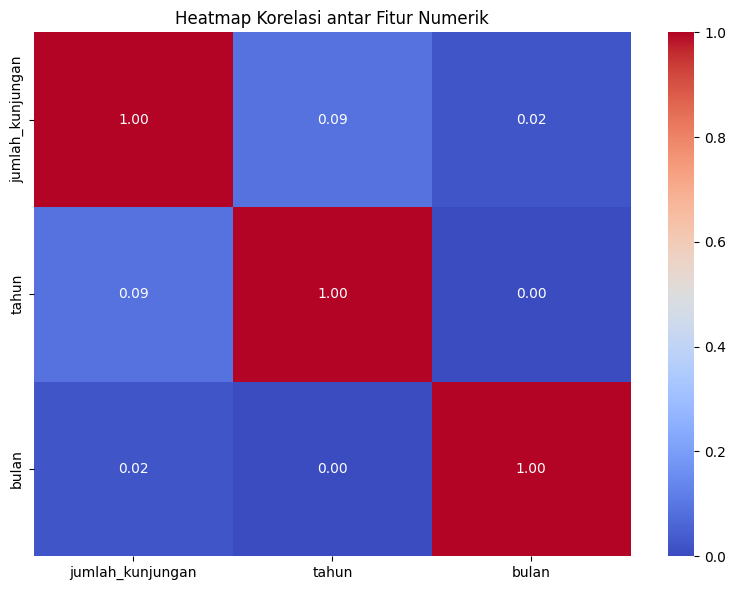

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()


### 4.2.2 JUMLAH PENGUNJUNG PER BULAN DAN GRUP PINTU

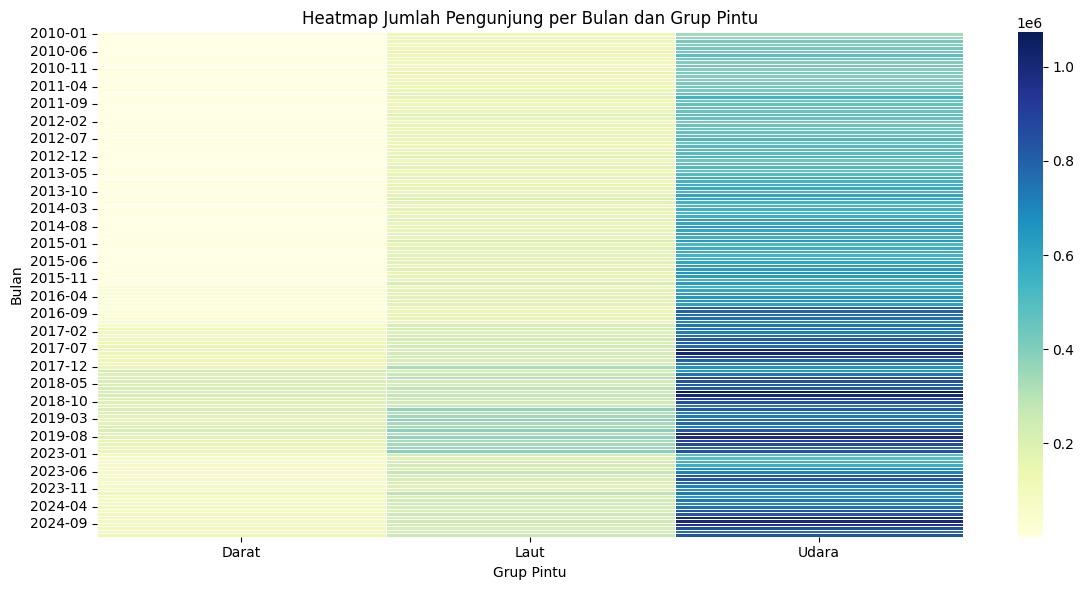

In [9]:
# Pastikan kolom Tanggal dalam format datetime
df_clean['tanggal'] = pd.to_datetime(df_clean['tanggal'])

# Buat kolom 'Bulan' dengan format YYYY-MM
df_clean['Bulan'] = df_clean['tanggal'].dt.to_period('M').astype(str)

# Pivot: Index = Bulan, Kolom = Grup Pintu
# ✅ Pivot: Index = Bulan, Kolom = grup_pintu
pivot_bulan_grup = df_clean.pivot_table(
    index='Bulan',
    columns='grup_pintu',
    values='jumlah_kunjungan',
    aggfunc='sum'
).fillna(0)

# 🔥 Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_bulan_grup, cmap='YlGnBu', linewidths=0.5, linecolor='white')
plt.title('Heatmap Jumlah Pengunjung per Bulan dan Grup Pintu')
plt.ylabel('Bulan')
plt.xlabel('Grup Pintu')
plt.tight_layout()
plt.show()



### 4.2.3 JUMLAH PENGUNJUNG PERTAHUN DAN JENIS PINTU

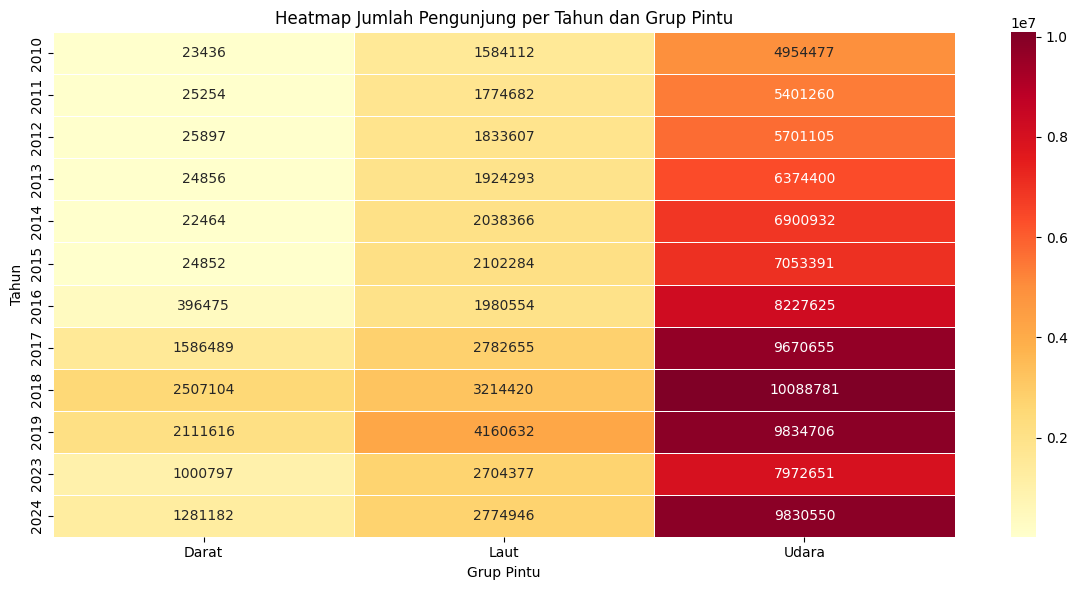

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan tahun sudah jadi kolom
df_clean['tahun'] = df_clean['tanggal'].dt.year

# Pivot tabel: Tahun vs Grup Pintu
pivot_tahun_grup = df_clean.pivot_table(
    index='tahun',
    columns='grup_pintu',
    values='jumlah_kunjungan',
    aggfunc='sum'
).fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_tahun_grup, cmap='YlOrRd', annot=True, fmt='.0f', linewidths=0.5, linecolor='white')
plt.title('Heatmap Jumlah Pengunjung per Tahun dan Grup Pintu')
plt.xlabel('Grup Pintu')
plt.ylabel('Tahun')
plt.tight_layout()
plt.show()

# 5. FEATURE ENGINEERING

Pada tahap ini, dilakukan pembuatan fitur-fitur tambahan dari data awal untuk membantu model dalam memahami pola-pola yang relevan, khususnya dalam konteks time series.

**Fitur yang Dibuat**

1. Fitur Waktu

- tahun : tahun dari kolom tanggal

- bulan : bulan dari kolom tanggal

- minggu : minggu ke-n dalam satu tahun

- hari : tanggal dalam satu bulan

Fitur ini membantu model dalam mengenali pola musiman (seasonality) dan tren berdasarkan waktu.


2. Fitur Lag

- lag_1, lag_2, lag_3 : jumlah kunjungan pada 1, 2, dan 3 bulan sebelumnya untuk setiap pintu masuk.

- Tujuannya untuk menangkap pengaruh masa lalu terhadap masa sekarang, yang penting dalam time series.


3. Fitur Rolling Mean

- rolling_3 : rata-rata jumlah kunjungan dalam 3 bulan sebelumnya (rolling mean), digunakan untuk menghaluskan fluktuasi dan menangkap tren jangka pendek.


4. Pembersihan Akhir

- Karena penggunaan fitur lag dan rolling, maka akan muncul nilai NaN pada baris-baris awal setiap kelompok pintu masuk. Oleh karena itu, semua baris yang mengandung nilai NaN dihapus menggunakan dropna().

In [11]:
# Salin dataframe utama
df_fe = df_clean.copy()

# 🎯 Tambah fitur waktu
df_fe['tahun'] = df_fe['tanggal'].dt.year
df_fe['bulan'] = df_fe['tanggal'].dt.month
df_fe['minggu'] = df_fe['tanggal'].dt.isocalendar().week
df_fe['hari'] = df_fe['tanggal'].dt.day

# 🔁 Buat fitur lag (per pintu masuk)
lag_features = [1, 2, 3]  # Bulan sebelumnya, 2 bulan sebelumnya, dst.
for lag in lag_features:
    df_fe[f'lag_{lag}'] = df_fe.groupby('pintu_masuk')['jumlah_kunjungan'].shift(lag)

# 📊 Fitur rata-rata rolling (optional)
df_fe['rolling_3'] = df_fe.groupby('pintu_masuk')['jumlah_kunjungan'].transform(lambda x: x.shift(1).rolling(3).mean())

# 🚫 Drop baris yang masih mengandung NaN akibat shift/rolling
df_fe = df_fe.dropna().reset_index(drop=True)

# ✅ Cek hasil
print("✅ Feature engineering selesai:")
display(df_fe.head())
print(f"Jumlah fitur total: {df_fe.shape[1]}")


✅ Feature engineering selesai:


,tanggal,pintu_masuk,jumlah_kunjungan,grup_pintu,tahun,bulan,Bulan,minggu,hari,lag_1,lag_2,lag_3,rolling_3
0,2010-04-01,Adi Sucipto,3733.0,Udara,2010,4,2010-04,13,1,4467.0,4006.0,3672.0,4048.333333
1,2010-05-01,Adi Sucipto,5170.0,Udara,2010,5,2010-05,17,1,3733.0,4467.0,4006.0,4068.666667
2,2010-06-01,Adi Sucipto,4747.0,Udara,2010,6,2010-06,22,1,5170.0,3733.0,4467.0,4456.666667
3,2010-07-01,Adi Sucipto,4576.0,Udara,2010,7,2010-07,26,1,4747.0,5170.0,3733.0,4550.000000
4,2010-08-01,Adi Sucipto,4188.0,Udara,2010,8,2010-08,30,1,4576.0,4747.0,5170.0,4831.000000


Jumlah fitur total: 13


# 6. SPLITTING DATA

**SPLITTIN DATA 90:10**

Pada tahap ini, data dibagi menjadi dua bagian utama: data latih (training) dan data uji (testing). Pembagian dilakukan secara berdasarkan waktu (time-based split), bukan secara acak, karena data bersifat time series.

1. Pemisahan Fitur dan Target

a. Fitur (X) yang digunakan untuk prediksi:

- tahun, bulan, minggu, hari: fitur waktu

- lag_1, lag_2, lag_3: data historis bulan sebelumnya

- rolling_3: rata-rata kunjungan 3 bulan terakhir

b. Target (y):

- jumlah_kunjungan: nilai yang ingin diprediksi


3. Pemisahan Train dan Test

- Data Train: data dari tahun 2010 hingga 2022

- Data Test: data dari tahun 2023 hingga 2024

Pemilihan berdasarkan waktu dilakukan untuk mensimulasikan prediksi masa depan, serta menjaga agar model tidak "melihat masa depan" saat belajar.


4. Ukuran Dataset

- Ukuran Data Train: 3654, baris, 8 fitur

- Ukuran Data Test: 435 baris, 8 fitur

In [72]:
import pandas as pd

# Baca dataset
file_path = "/content/data_normalisasi_Kunjungan_2010_2024.csv"
df = pd.read_csv(file_path)

# Pastikan kolom tanggal dalam format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Urutkan data berdasarkan tanggal
df = df.sort_values('tanggal').reset_index(drop=True)

# Hitung cutoff index untuk 90% train
cutoff_index = int(len(df) * 0.9)
cutoff_date = df.loc[cutoff_index, 'tanggal']

cutoff_date


Timestamp('2023-10-01 00:00:00')

In [73]:
# 🎯 Pisahkan fitur dan target
features = [
    'tahun', 'bulan', 'minggu', 'hari',
    'lag_1', 'lag_2', 'lag_3', 'rolling_3'
]
target = 'jumlah_kunjungan'
# ⏱ Split berdasarkan tahun (bukan acak)
df_train = df_fe[df_fe['tanggal'] < '2023-10-01']
df_test = df_fe[df_fe['tanggal'] >= '2023-10-01']

# 🔎 X dan y
X_train = df_train[features]
y_train = df_train[target]

X_test = df_test[features]
y_test = df_test[target]

# ✅ Cek ukuran dataset
print(f"🔧 Ukuran Data Train: {X_train.shape}")
print(f"🧪 Ukuran Data Test : {X_test.shape}")

🔧 Ukuran Data Train: (3654, 8)
🧪 Ukuran Data Test : (435, 8)


# 7. TRAINING RANDOM FOREST REGRESSOR

Pada tahap ini dilakukan proses pelatihan model prediktif menggunakan algoritma Random Forest Regressor. Random Forest adalah model berbasis ensemble yang membangun banyak pohon keputusan dan menggabungkannya untuk meningkatkan akurasi dan mengurangi overfitting.

**a. Konfigurasi Model**

Model RandomForestRegressor diinisialisasi dengan parameter sebagai berikut:

- n_estimators=200 : Jumlah pohon dalam hutan.

- max_depth=12 : Kedalaman maksimum tiap pohon.

- random_state=42 : Untuk memastikan hasil yang konsisten.

- n_jobs=-1 : Menggunakan semua core prosesor yang tersedia untuk mempercepat proses training.


**b. Proses Training**

Model dilatih menggunakan data latih (X_train, y_train) yang telah disiapkan pada langkah sebelumnya. Model ini siap digunakan untuk melakukan prediksi dan evaluasi performa pada data uji.

In [74]:
from sklearn.ensemble import RandomForestRegressor

# 🌲 Inisialisasi model Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

# 🔁 Training
rf_model.fit(X_train, y_train)

# ✅ Cek model
print("✅ Model Random Forest telah dilatih.")


✅ Model Random Forest telah dilatih.


# 8. EVALUASI DAN VISUALISASI

**A. Evaluasi**

Setelah proses training, model dievaluasi menggunakan data uji (`X_test`, `y_test`) untuk mengukur akurasi dan generalisasi terhadap data yang belum pernah dilihat. Beberapa metrik yang digunakan:

- **MAE (Mean Absolute Error)**: Rata-rata kesalahan absolut antara prediksi dan nilai aktual.
- **RMSE (Root Mean Squared Error)**: Akar dari rata-rata kuadrat kesalahan, lebih sensitif terhadap kesalahan besar.
- **MAPE (Mean Absolute Percentage Error)**: Rata-rata kesalahan dalam bentuk persentase.
- **R² (R-squared)**: Mengukur proporsi variansi target yang berhasil dijelaskan oleh fitur.

**B. Visualisasi**

Grafik berikut membandingkan jumlah kunjungan aktual dan hasil prediksi berdasarkan tanggal. Hal ini membantu dalam memahami seberapa baik model menangkap pola tren waktu.


| Metrik   | Nilai  | Penjelasan Singkat                                                  |
| -------- | ------ | ------------------------------------------------------------------- |
| **MAE**  | 5.722  | Rata-rata kesalahan absolut: model meleset sekitar 5.700 pengunjung |
| **RMSE** | 15.503 | Ada beberapa error yang lebih besar, tapi masih wajar               |
| **MAPE** | 47.47% | Rata-rata error relatif    |
| **R²**   | 0.9735 | Model menjelaskan 97% variasi data aktual → **sangat baik**         |



In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 🔮 Prediksi data test
y_pred = rf_model.predict(X_test)

# 📊 Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# ⚠️ Stabilkan nilai y_test agar tidak terlalu kecil
adjusted_y_test = np.where(y_test < 1000, 1000, y_test)
mape = np.mean(np.abs((y_test - y_pred) / adjusted_y_test)) * 100

# 🖨️ Cetak hasil evaluasi
print("📊 Hasil Evaluasi Model:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}% (stabilized)")
print(f"R²   : {r2:.4f}")


📊 Hasil Evaluasi Model:
MAE  : 4588.85
RMSE : 11211.76
MAPE : 27.06% (stabilized)
R²   : 0.9875


## VISUALISASI PREDIKSI VS AKTUAL JUMLAH KUNJUNGAN WISATAWAN

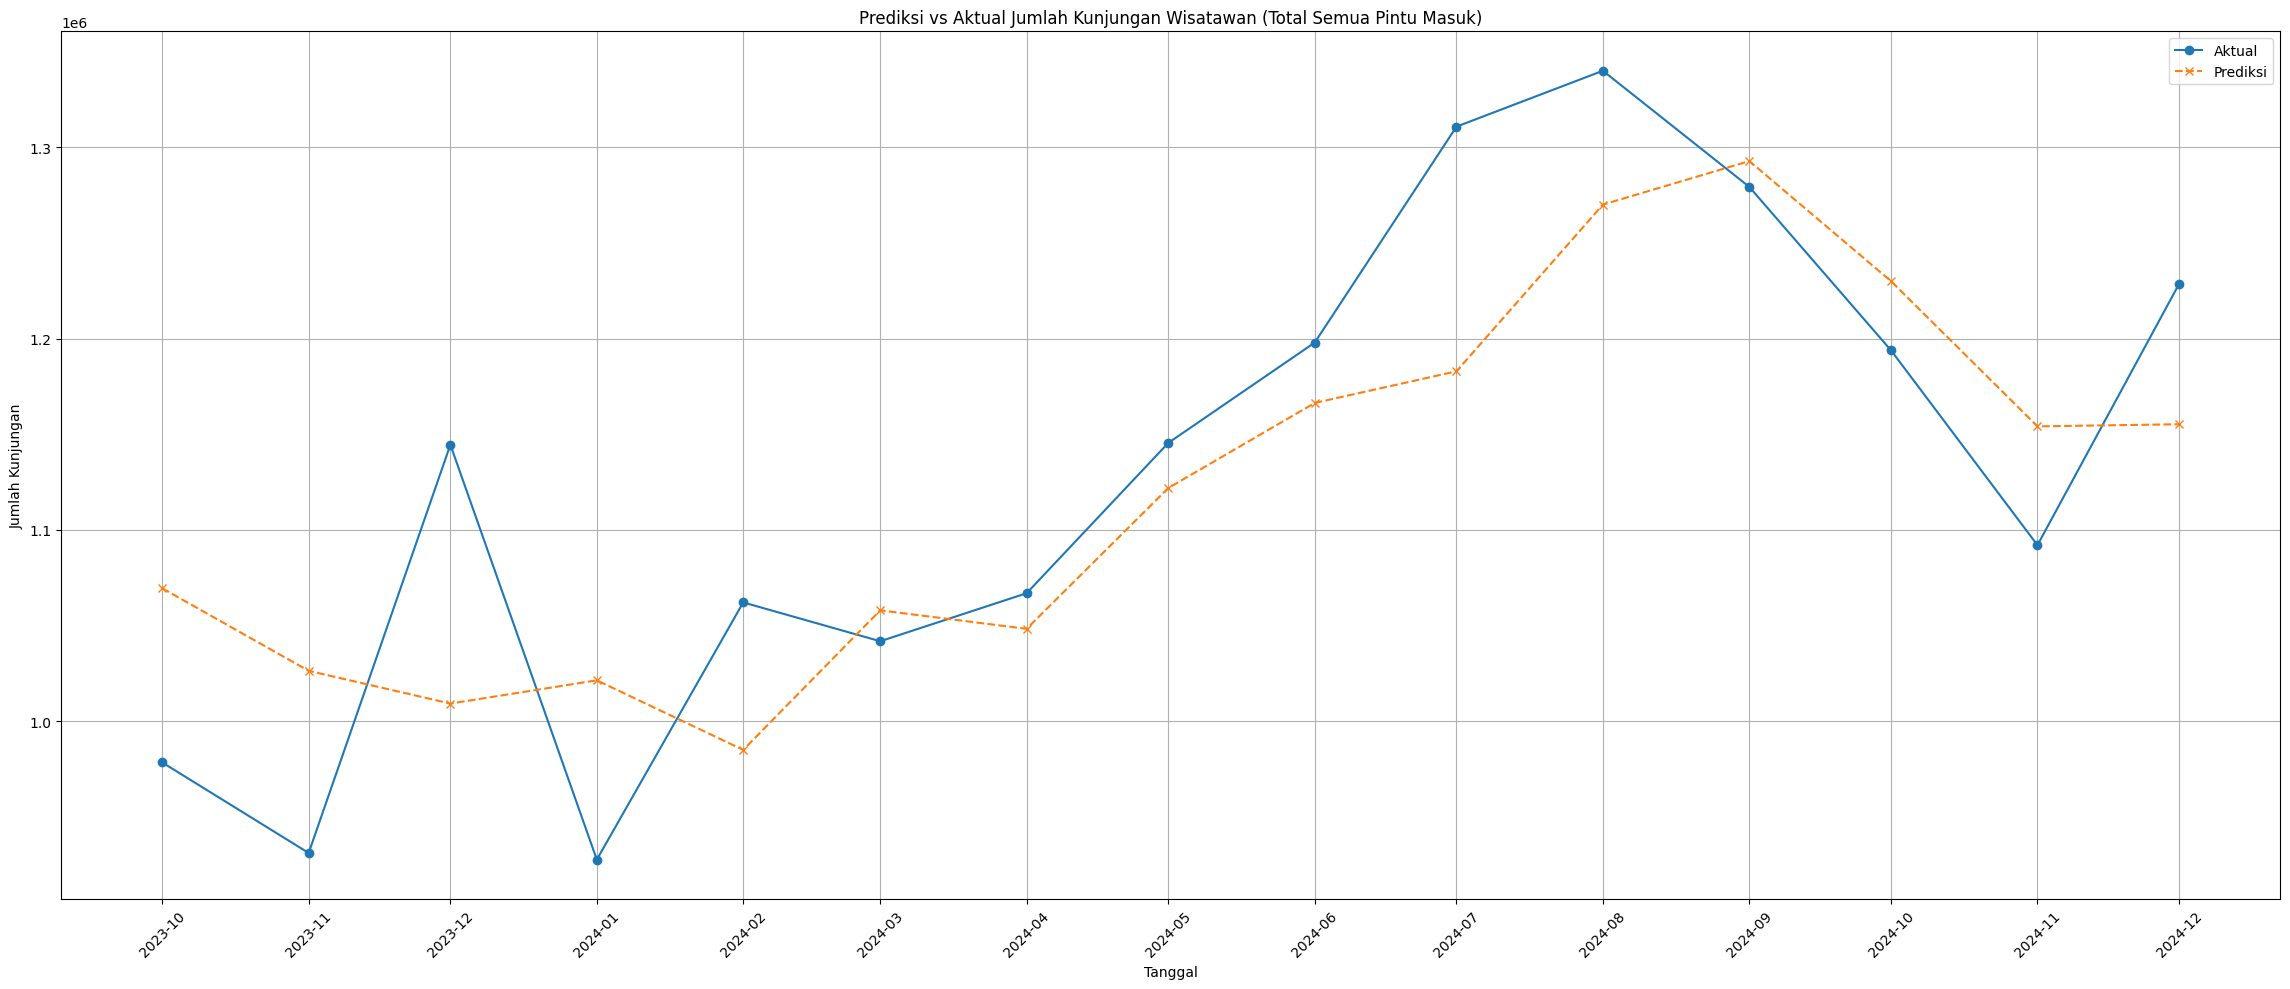

In [76]:
import matplotlib.dates as mdates

# Gabungkan tanggal & jumlah kunjungan aktual & prediksi
df_eval = df_test.copy()
df_eval['y_test'] = y_test.values
df_eval['y_pred'] = y_pred

# Agregasi total semua pintu masuk per tanggal
df_eval_total = df_eval.groupby('tanggal')[['y_test', 'y_pred']].sum().reset_index()

plt.figure(figsize=(23, 10))
plt.plot(df_eval_total['tanggal'], df_eval_total['y_test'], label='Aktual', marker='o')
plt.plot(df_eval_total['tanggal'], df_eval_total['y_pred'], label='Prediksi', linestyle='--', marker='x')
plt.title('Prediksi vs Aktual Jumlah Kunjungan Wisatawan (Total Semua Pintu Masuk)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kunjungan')
plt.legend()
plt.grid(True)

# Paksa semua bulan muncul di sumbu X
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## VISUALISASI PREDIKSI VS AKTUAL PER GRUP PINTU

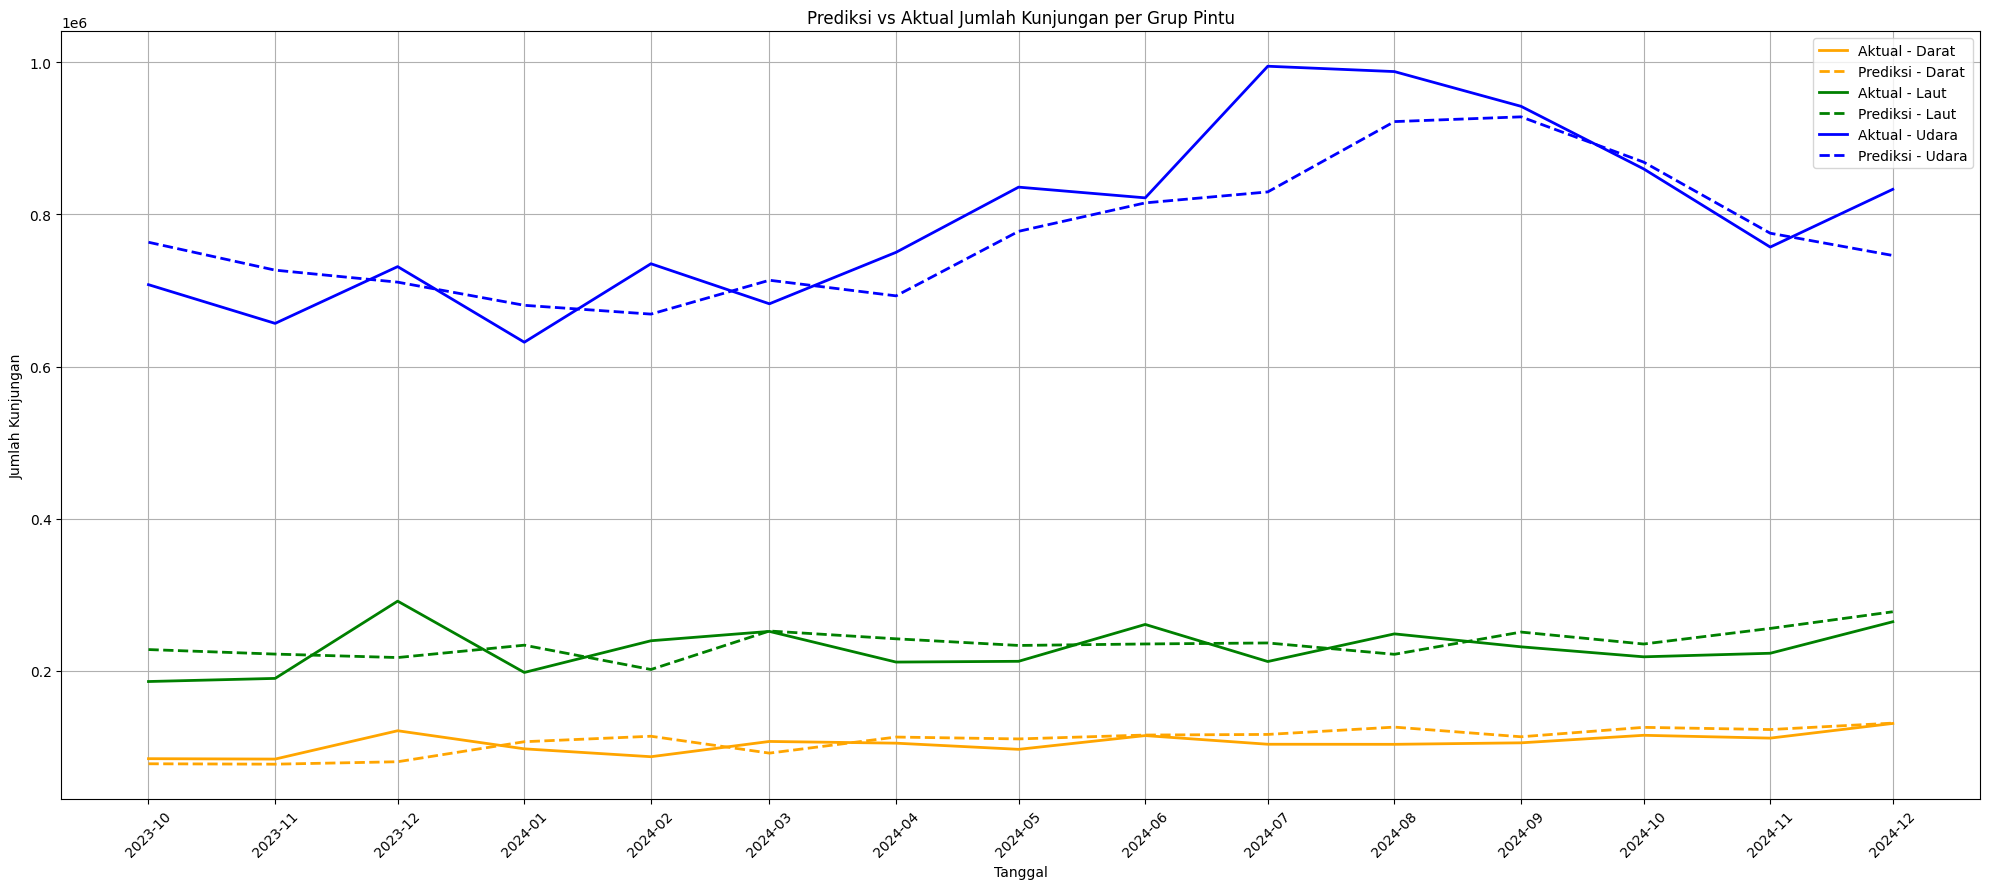

In [77]:
# Memastikan kolom grup_pintu ada
if 'grup_pintu' not in df_eval.columns:
    df_eval = pd.merge(
        df_eval,
        df_fe[['tanggal', 'pintu_masuk', 'grup_pintu']],
        on=['tanggal', 'pintu_masuk'],
        how='left'
    )

df_grouped = df_eval.groupby(['tanggal', 'grup_pintu'])[['y_test', 'y_pred']].sum().reset_index()

plt.figure(figsize=(20, 9))
colors = {'Udara': 'blue', 'Laut': 'green', 'Darat': 'orange'}

for grup in df_grouped['grup_pintu'].unique():
    data = df_grouped[df_grouped['grup_pintu'] == grup]
    plt.plot(data['tanggal'], data['y_test'], label=f'Aktual - {grup}', color=colors.get(grup, 'gray'), linewidth=2)
    plt.plot(data['tanggal'], data['y_pred'], label=f'Prediksi - {grup}', color=colors.get(grup, 'gray'), linestyle='--', linewidth=2)

plt.title('Prediksi vs Aktual Jumlah Kunjungan per Grup Pintu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kunjungan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Paksa semua bulan muncul
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


# 9. RECURSIVE FORECASTING

**Tujuan**: Memprediksi jumlah kunjungan wisatawan per pintu masuk untuk bulan-bulan setelah data terakhir (misal: Januari 2025 hingga Desember 2025) menggunakan pendekatan recursive dengan model Random Forest yang sudah dilatih.

**A. RECURSIVE FORECASTING (PERAMALAN BERULANG)**

Pada tahap ini, dilakukan proses peramalan jumlah kunjungan wisatawan ke depan sebanyak **12 bulan** (1 tahun) secara bertahap menggunakan pendekatan **recursive forecasting**. Teknik ini dilakukan dengan cara:

1. Mengambil data historis terakhir dari masing-masing `pintu_masuk`.
2. Menghitung fitur-fitur penting seperti:
   - `tahun`, `bulan`, `minggu`, `hari`
   - `lag_1`, `lag_2`, `lag_3`
   - (optional) `rolling_3`
3. Melakukan prediksi jumlah kunjungan pada bulan berikutnya menggunakan model **Random Forest**.
4. Menambahkan hasil prediksi ke data historis untuk digunakan sebagai input bulan selanjutnya.
5. Proses ini diulang hingga mencapai 12 bulan ke depan.

**B. Visualisasi Peramalan**

Grafik berikut menampilkan hasil prediksi (berwarna setelah garis merah putus-putus) dibandingkan dengan data historis, dibedakan berdasarkan `pintu_masuk`.

> Garis vertikal merah menunjukkan **awal prediksi** berdasarkan hasil training terakhir.


**C. Ekspor Data**

Hasil prediksi untuk data test (`df_test`) juga ditampilkan dalam bentuk tabel yang memuat:
- Tanggal
- Pintu Masuk
- Jumlah Kunjungan Aktual
- Jumlah Kunjungan Prediksi
- Selisih (error)

Tabel ini kemudian diekspor ke file CSV bernama: `hasil_prediksi.csv`.

**Output File**
```bash
📁 hasil_prediksi.csv


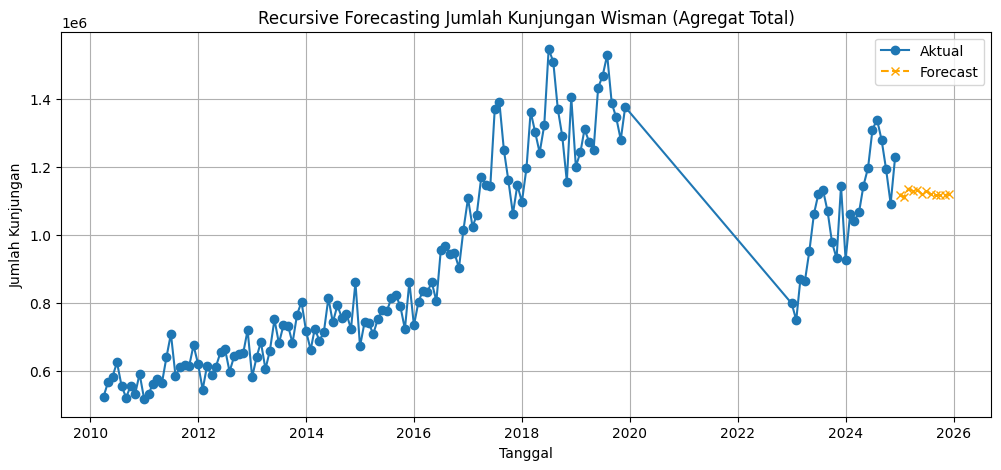

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agregasi total bulanan ---
df['tanggal'] = pd.to_datetime(df['tanggal'])
df_total = df.groupby('tanggal', as_index=False)['jumlah_kunjungan'].sum().sort_values('tanggal')

# --- 2. Feature engineering ---
df_total['tahun'] = df_total['tanggal'].dt.year
df_total['bulan'] = df_total['tanggal'].dt.month
df_total['lag_1'] = df_total['jumlah_kunjungan'].shift(1)
df_total['lag_2'] = df_total['jumlah_kunjungan'].shift(2)
df_total['lag_3'] = df_total['jumlah_kunjungan'].shift(3)
df_total['rolling_3'] = df_total['jumlah_kunjungan'].rolling(3).mean()

df_total = df_total.dropna()

train = df_total[df_total['tanggal'] < '2023-10-01']
test = df_total[df_total['tanggal'] >= '2023-10-01']

features = ['tahun', 'bulan', 'lag_1', 'lag_2', 'lag_3', 'rolling_3']
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(train[features], train['jumlah_kunjungan'])

# --- 3. Recursive Forecasting ---
future_steps = 12  # prediksi 12 bulan ke depan
last_known = df_total.copy()

predictions = []
last_row = last_known.iloc[-1].copy()

for i in range(future_steps):
    tahun = last_row['tahun'] + ((last_row['bulan'] + 1) // 13)
    bulan = (last_row['bulan'] % 12) + 1
    tanggal_pred = pd.Timestamp(year=tahun, month=bulan, day=1)

    # update lag
    lag_1 = last_row['jumlah_kunjungan']
    lag_2 = last_row['lag_1']
    lag_3 = last_row['lag_2']
    rolling_3 = pd.Series([lag_1, lag_2, lag_3]).mean()

    X_new = pd.DataFrame([{
        'tahun': tahun,
        'bulan': bulan,
        'lag_1': lag_1,
        'lag_2': lag_2,
        'lag_3': lag_3,
        'rolling_3': rolling_3
    }])

    y_pred = model.predict(X_new)[0]

    # simpan hasil
    predictions.append({'tanggal': tanggal_pred, 'jumlah_kunjungan': y_pred})

    # update last_row untuk iterasi berikutnya
    last_row = {
        'tahun': tahun,
        'bulan': bulan,
        'jumlah_kunjungan': y_pred,
        'lag_1': lag_1,
        'lag_2': lag_2
    }

# --- 4. Gabungkan hasil ---
df_pred = pd.DataFrame(predictions)
df_plot = pd.concat([df_total, df_pred])

# --- 5. Plot ---
plt.figure(figsize=(12,5))
plt.plot(df_total['tanggal'], df_total['jumlah_kunjungan'], marker='o', label='Aktual')
plt.plot(df_pred['tanggal'], df_pred['jumlah_kunjungan'], marker='x', linestyle='--', color='orange', label='Forecast')

plt.title('Recursive Forecasting Jumlah Kunjungan Wisman (Agregat Total)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kunjungan')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Pastikan tanggal dalam format datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Buat mapping pintu_masuk -> grup_pintu (ambil unik dari data asli)
map_grup = df[['pintu_masuk', 'grup_pintu']].drop_duplicates().set_index('pintu_masuk')['grup_pintu'].to_dict()

# DataFrame untuk simpan semua prediksi
all_preds = []

# Loop per pintu masuk
for pintu in df['pintu_masuk'].unique():
    df_pintu = df[df['pintu_masuk'] == pintu].copy()
    df_pintu = df_pintu.groupby('tanggal', as_index=False)['jumlah_kunjungan'].sum().sort_values('tanggal')

    # Feature engineering
    df_pintu['tahun'] = df_pintu['tanggal'].dt.year
    df_pintu['bulan'] = df_pintu['tanggal'].dt.month
    df_pintu['lag_1'] = df_pintu['jumlah_kunjungan'].shift(1)
    df_pintu['lag_2'] = df_pintu['jumlah_kunjungan'].shift(2)
    df_pintu['lag_3'] = df_pintu['jumlah_kunjungan'].shift(3)
    df_pintu['rolling_3'] = df_pintu['jumlah_kunjungan'].rolling(3).mean()
    df_pintu = df_pintu.dropna()

    # Training hanya sampai akhir 2023
    train = df_pintu[df_pintu['tanggal'] < '2023-10-01']
    features = ['tahun', 'bulan', 'lag_1', 'lag_2', 'lag_3', 'rolling_3']

    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(train[features], train['jumlah_kunjungan'])

    # Recursive forecasting
    last_row = df_pintu.iloc[-1].copy()
    future_steps = 12

    for i in range(future_steps):
        # Update tahun & bulan
        tahun = last_row['tahun'] + ((last_row['bulan'] + 1) // 13)
        bulan = (last_row['bulan'] % 12) + 1
        tanggal_pred = pd.Timestamp(year=tahun, month=bulan, day=1)

        # Update lag
        lag_1 = last_row['jumlah_kunjungan']
        lag_2 = last_row['lag_1']
        lag_3 = last_row['lag_2']
        rolling_3 = pd.Series([lag_1, lag_2, lag_3]).mean()

        # Prediksi
        X_new = pd.DataFrame([{
            'tahun': tahun,
            'bulan': bulan,
            'lag_1': lag_1,
            'lag_2': lag_2,
            'lag_3': lag_3,
            'rolling_3': rolling_3
        }])
        y_pred = model.predict(X_new)[0]

        # Simpan hasil prediksi lengkap dengan grup_pintu
        all_preds.append({
            'pintu_masuk': pintu,
            'tanggal': tanggal_pred,
            'jumlah_kunjungan': y_pred,
            'grup_pintu': map_grup.get(pintu, None)
        })

        # Update last_row untuk iterasi berikutnya
        last_row = {
            'tahun': tahun,
            'bulan': bulan,
            'jumlah_kunjungan': y_pred,
            'lag_1': lag_1,
            'lag_2': lag_2
        }

# Gabungkan semua prediksi
df_pred_all = pd.DataFrame(all_preds)

# Filter untuk tahun 2025
prediksi_2025 = df_pred_all[df_pred_all['tanggal'].dt.year == 2025].copy()

# Format jumlah_kunjungan jadi integer
prediksi_2025['jumlah_kunjungan'] = prediksi_2025['jumlah_kunjungan'].round().astype(int)

print(prediksi_2025)


        pintu_masuk    tanggal  jumlah_kunjungan grup_pintu
0       Adi Sucipto 2025-01-01              5743      Udara
1       Adi Sucipto 2025-02-01              6080      Udara
2       Adi Sucipto 2025-03-01              6790      Udara
3       Adi Sucipto 2025-04-01              6177      Udara
4       Adi Sucipto 2025-05-01              6680      Udara
..              ...        ...               ...        ...
343  Soekarno-Hatta 2025-08-01            209947      Udara
344  Soekarno-Hatta 2025-09-01            208828      Udara
345  Soekarno-Hatta 2025-10-01            208592      Udara
346  Soekarno-Hatta 2025-11-01            208828      Udara
347  Soekarno-Hatta 2025-12-01            208126      Udara

[348 rows x 4 columns]


In [80]:
prediksi_2025.to_csv("hasil_prediksi_2025_split90:10.csv", index=False)
print("✅ hasil_prediksi_2025_split90:10.csv")

✅ hasil_prediksi_2025_split90:10.csv


# VISUALISASI HASIL PREDIKSI 2025

## GUNAKAN INI AJA UNTUK PENULISAN SKRIPSIMU YA DIL


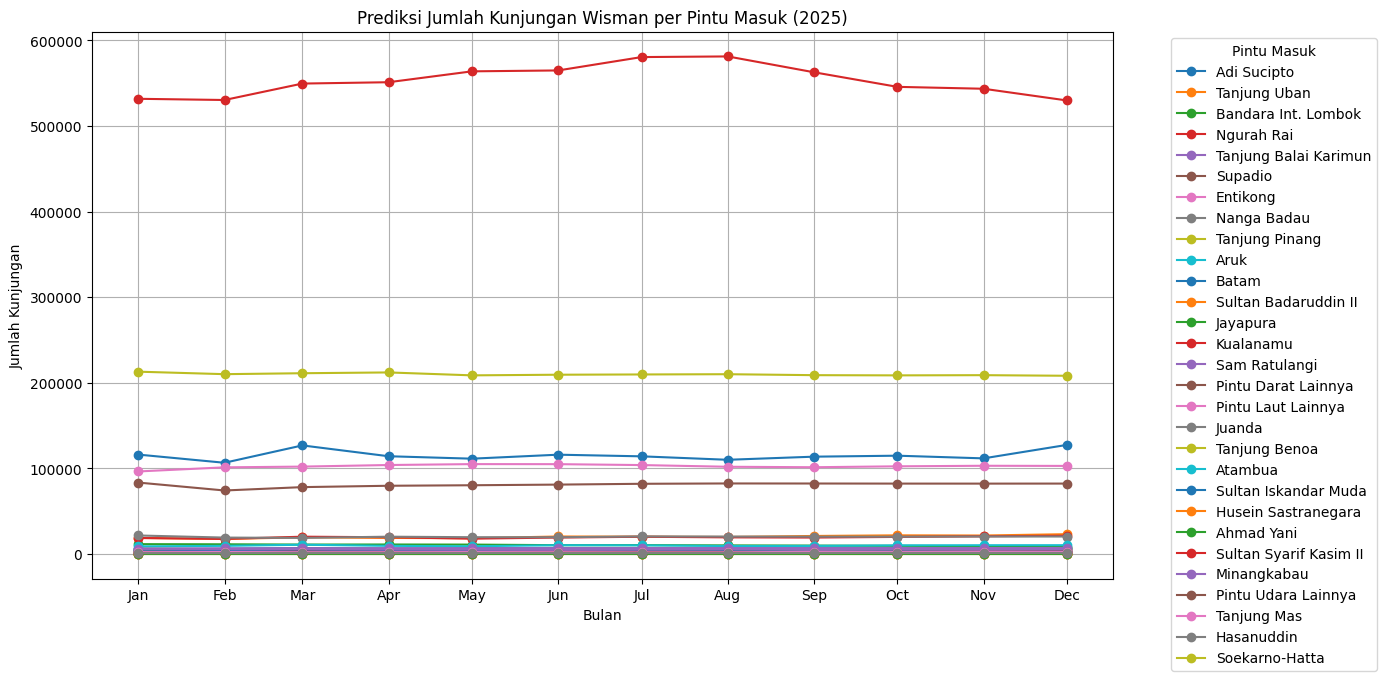

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file hasil prediksi
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")

# Pastikan kolom tanggal datetime
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# Buat daftar tanggal tetap untuk semua bulan di 2025
all_months = pd.date_range(start="2025-01-01", end="2025-12-01", freq='MS')

# Plot line chart per pintu masuk
plt.figure(figsize=(14, 7))
for pintu in prediksi_2025['pintu_masuk'].unique():
    data_pintu = prediksi_2025[prediksi_2025['pintu_masuk'] == pintu][['tanggal', 'jumlah_kunjungan']]
    data_pintu = data_pintu.set_index('tanggal').reindex(all_months).reset_index()
    data_pintu.columns = ['tanggal', 'jumlah_kunjungan']

    plt.plot(data_pintu['tanggal'], data_pintu['jumlah_kunjungan'], marker='o', label=pintu)

# Format plot
plt.title("Prediksi Jumlah Kunjungan Wisman per Pintu Masuk (2025)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kunjungan")
plt.xticks(all_months, [d.strftime('%b') for d in all_months])  # tampilkan singkatan bulan
plt.legend(title="Pintu Masuk", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## SAMA DIAGRAM DUA DUANYA INI


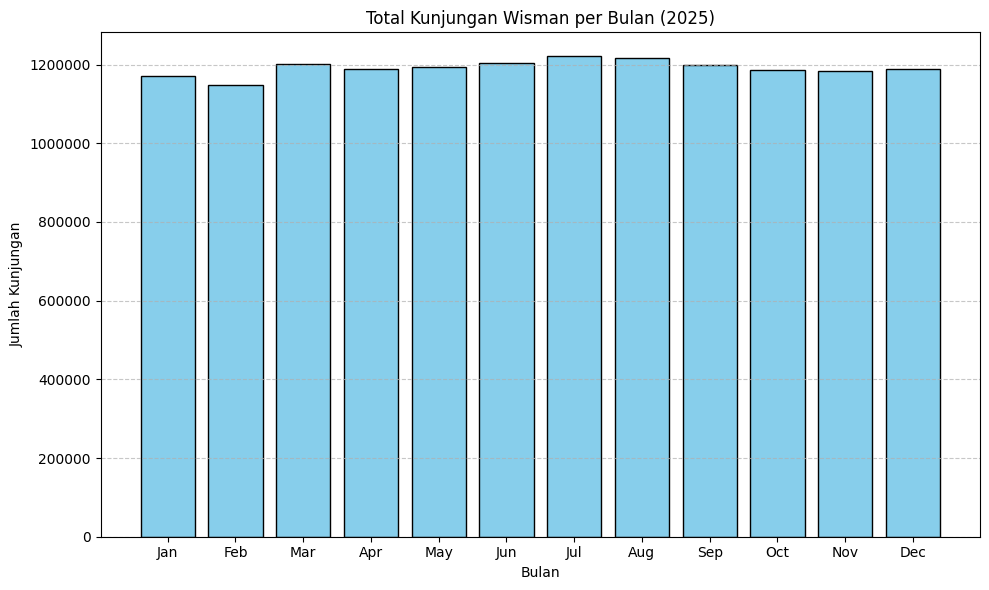

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Baca file
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# Filter hanya tahun 2025
prediksi_2025 = prediksi_2025[prediksi_2025['tanggal'].dt.year == 2025]

# Group by bulan untuk total pengunjung
df_bulanan = (
    prediksi_2025.groupby(prediksi_2025['tanggal'].dt.month)['jumlah_kunjungan']
    .sum()
    .reset_index()
)
df_bulanan.columns = ['bulan', 'total_kunjungan']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_bulanan['bulan'], df_bulanan['total_kunjungan'], color='skyblue', edgecolor='black')

# Format angka di sumbu Y tanpa koma dan tanpa notasi ilmiah
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "")))

# Label dan format
plt.title("Total Kunjungan Wisman per Bulan (2025)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kunjungan")
plt.xticks(df_bulanan['bulan'],
           [pd.Timestamp(year=2025, month=m, day=1).strftime('%b') for m in df_bulanan['bulan']])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


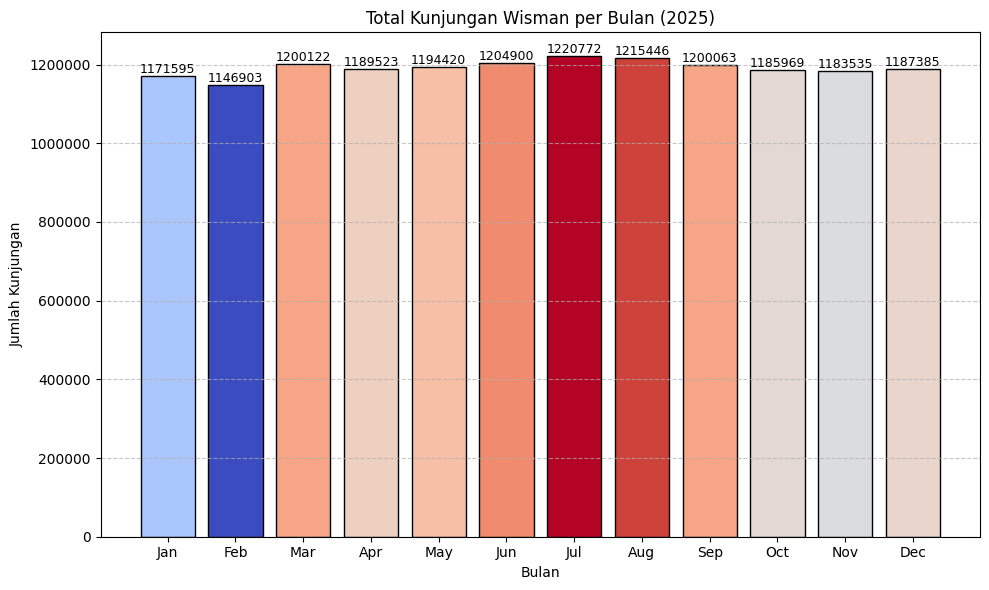

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Baca file
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# Filter hanya tahun 2025
prediksi_2025 = prediksi_2025[prediksi_2025['tanggal'].dt.year == 2025]

# Group by bulan
df_bulanan = (
    prediksi_2025.groupby(prediksi_2025['tanggal'].dt.month)['jumlah_kunjungan']
    .sum()
    .reset_index()
)
df_bulanan.columns = ['bulan', 'total_kunjungan']

# Normalisasi nilai untuk colormap
norm_values = (df_bulanan['total_kunjungan'] - df_bulanan['total_kunjungan'].min()) / \
              (df_bulanan['total_kunjungan'].max() - df_bulanan['total_kunjungan'].min())

# Pilih colormap
cmap = plt.cm.coolwarm  # bisa coba 'viridis', 'plasma', dll
colors = cmap(norm_values)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_bulanan['bulan'], df_bulanan['total_kunjungan'], color=colors, edgecolor='black')

# Format angka sumbu Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "")))

# Tambahkan label angka di atas batang
for bar, value in zip(bars, df_bulanan['total_kunjungan']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(value):,}'.replace(",", ""),
             ha='center', va='bottom', fontsize=9)

# Label dan format
plt.title("Total Kunjungan Wisman per Bulan (2025)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kunjungan")
plt.xticks(df_bulanan['bulan'],
           [pd.Timestamp(year=2025, month=m, day=1).strftime('%b') for m in df_bulanan['bulan']])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


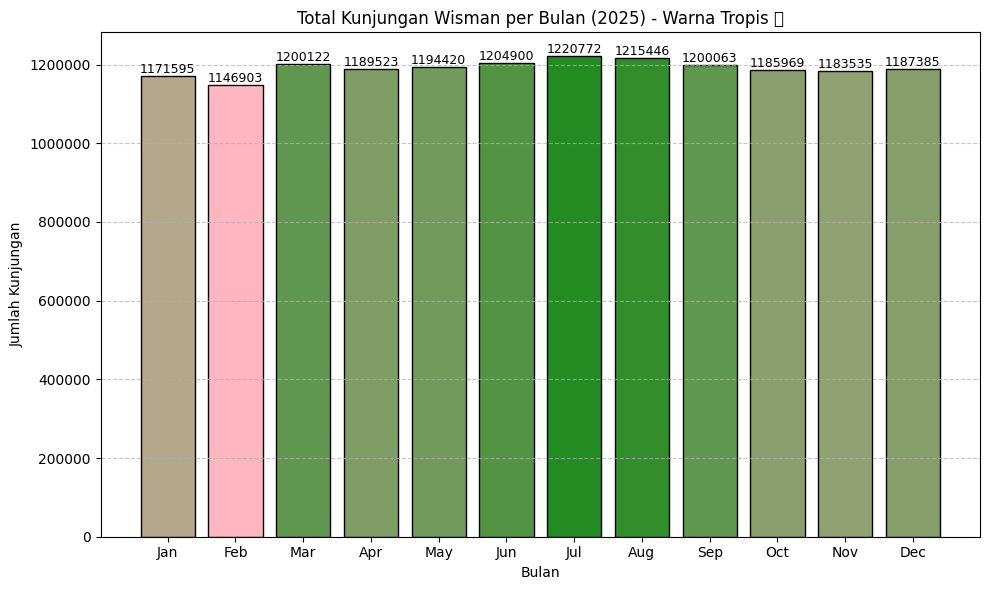

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.colors as mcolors

# Baca file
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# Filter hanya tahun 2025
prediksi_2025 = prediksi_2025[prediksi_2025['tanggal'].dt.year == 2025]

# Group by bulan
df_bulanan = (
    prediksi_2025.groupby(prediksi_2025['tanggal'].dt.month)['jumlah_kunjungan']
    .sum()
    .reset_index()
)
df_bulanan.columns = ['bulan', 'total_kunjungan']

# Normalisasi nilai untuk colormap
norm_values = (df_bulanan['total_kunjungan'] - df_bulanan['total_kunjungan'].min()) / \
              (df_bulanan['total_kunjungan'].max() - df_bulanan['total_kunjungan'].min())

# Buat colormap custom dari pink ke hijau
cmap = mcolors.LinearSegmentedColormap.from_list("tropis", ["#ffb6c1", "#228b22"])
colors = cmap(norm_values)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_bulanan['bulan'], df_bulanan['total_kunjungan'], color=colors, edgecolor='black')

# Format angka sumbu Y tanpa koma
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", "")))

# Tambahkan label angka di atas batang
for bar, value in zip(bars, df_bulanan['total_kunjungan']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(value):,}'.replace(",", ""),
             ha='center', va='bottom', fontsize=9)

# Label dan format
plt.title("Total Kunjungan Wisman per Bulan (2025) - Warna Tropis 🌴")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Kunjungan")
plt.xticks(df_bulanan['bulan'],
           [pd.Timestamp(year=2025, month=m, day=1).strftime('%b') for m in df_bulanan['bulan']])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Bulan ramai → hijau segar

Bulan sepi → pink lembut

## VISUALISASI JUMLAH PENGUNJUNG, AKU AMBIL SAMPELNYA 2 PINTU MASUK TIAP-TIAP GRUPNYA.

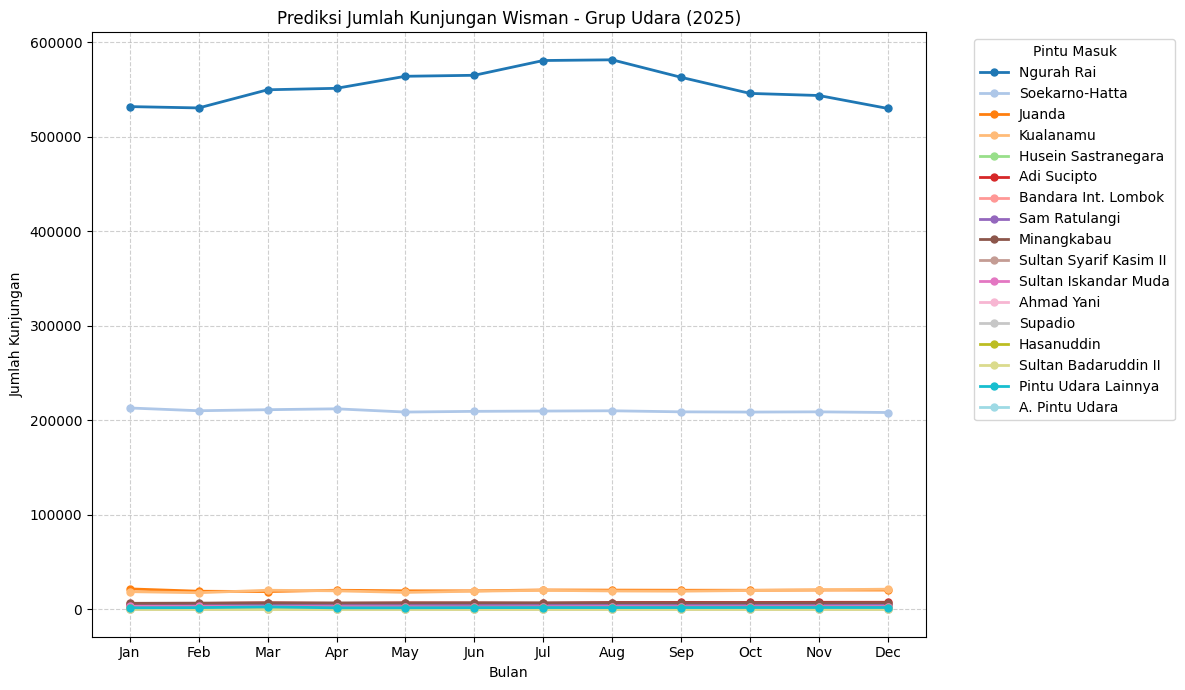

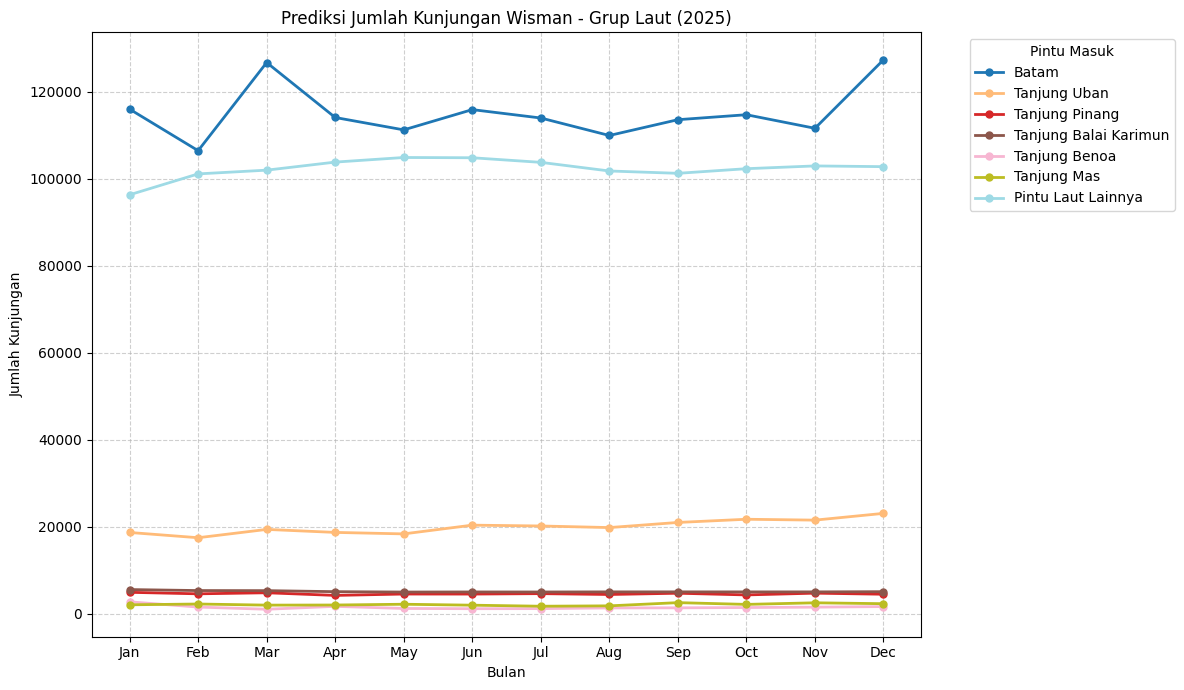

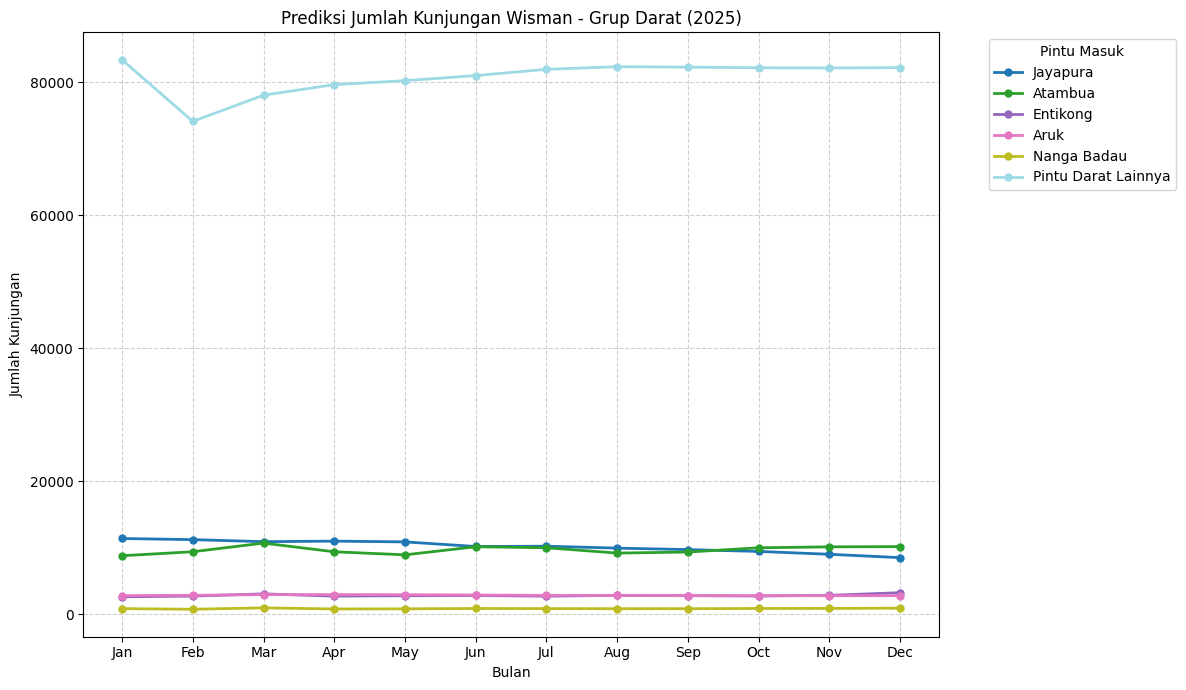

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# --- Tambah kolom bulan & nama bulan ---
prediksi_2025['bulan'] = prediksi_2025['tanggal'].dt.month
prediksi_2025['nama_bulan'] = prediksi_2025['tanggal'].dt.strftime('%b')

# --- Definisi grup pintu masuk ---
grup_pintu = {
    "Grup Udara": [
        'Ngurah Rai', 'Soekarno-Hatta', 'Juanda', 'Kualanamu', 'Husein Sastranegara', 'Adi Sucipto',
        'Bandara Int. Lombok', 'Sam Ratulangi', 'Minangkabau', 'Sultan Syarif Kasim II',
        'Sultan Iskandar Muda', 'Ahmad Yani', 'Supadio', 'Hasanuddin',
        'Sultan Badaruddin II', 'Pintu Udara Lainnya', 'A. Pintu Udara'
    ],
    "Grup Laut": [
        'Batam', 'Tanjung Uban', 'Tanjung Pinang', 'Tanjung Balai Karimun',
        'Tanjung Benoa', 'Tanjung Mas', 'Pintu Laut Lainnya'
    ],
    "Grup Darat": [
        'Jayapura', 'Atambua', 'Entikong', 'Aruk', 'Nanga Badau', 'Pintu Darat Lainnya'
    ]
}

# --- Warna (otomatis pakai colormap) ---
import numpy as np
import matplotlib.cm as cm

# --- Plot per grup ---
for grup, pintu_list in grup_pintu.items():
    plt.figure(figsize=(12, 7))

    colors = cm.get_cmap('tab20', len(pintu_list))

    for idx, pintu in enumerate(pintu_list):
        data_pintu = (
            prediksi_2025[prediksi_2025['pintu_masuk'] == pintu]
            .groupby(['bulan', 'nama_bulan'])['jumlah_kunjungan']
            .sum()
            .reset_index()
            .sort_values('bulan')
        )

        plt.plot(
            data_pintu['nama_bulan'],
            data_pintu['jumlah_kunjungan'],
            marker='o',
            linewidth=2,
            markersize=5,
            color=colors(idx),
            label=pintu
        )

    plt.title(f"Prediksi Jumlah Kunjungan Wisman - {grup} (2025)")
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Kunjungan")
    plt.legend(title="Pintu Masuk", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


### SAMPEL 2 PINTU PER GRUP PINTU

In [86]:
# Grup Udara
pintu_udara = ["Soekarno-Hatta", "Kualanamu"]

# Grup Darat
pintu_darat = ["Entikong", "Atambua"]

# Grup Laut
pintu_laut = ["Batam", "Tanjung Pinang"]

# Loop per grup → bikin grafik batang/garis per bulan


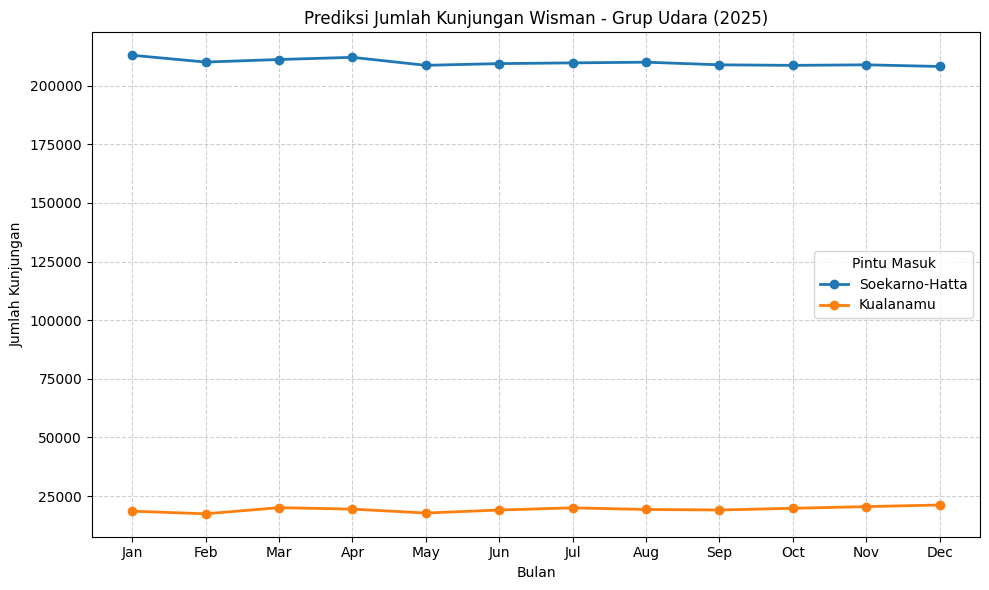

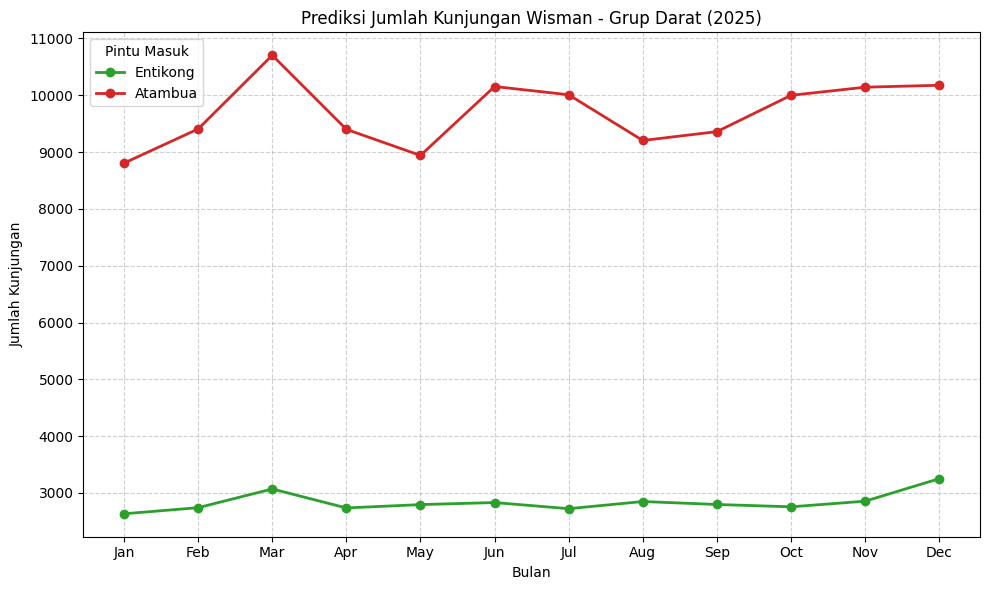

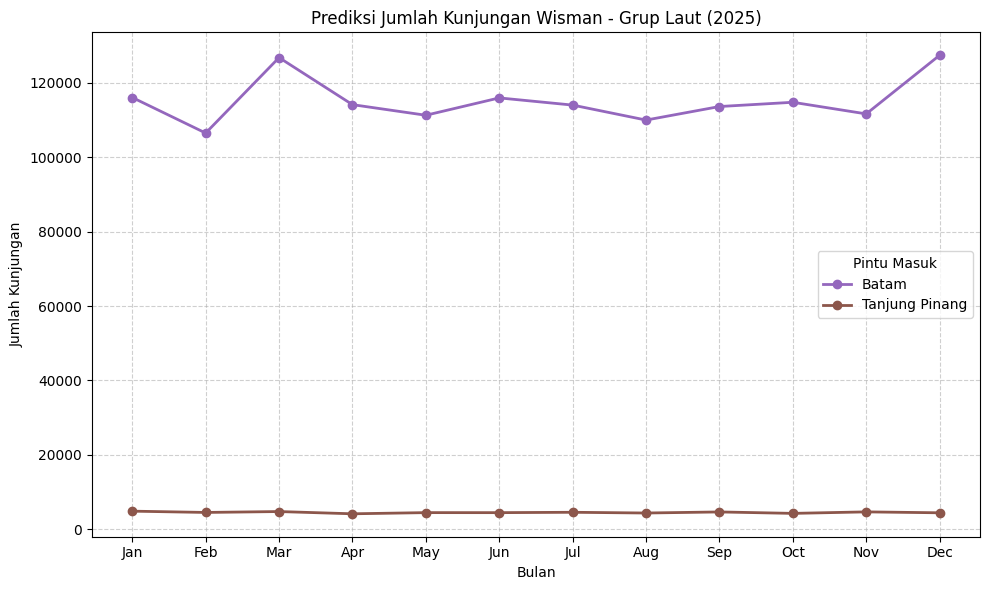

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Baca data ---
prediksi_2025 = pd.read_csv("hasil_prediksi_2025_split90:10.csv")
prediksi_2025['tanggal'] = pd.to_datetime(prediksi_2025['tanggal'])

# --- Hapus kategori yang tidak diperlukan ---
prediksi_2025 = prediksi_2025[
    ~prediksi_2025['pintu_masuk'].isin(["Jumlah (A+B+C)", "Lainnya"])
]

# --- Ambil bulan untuk grup ---
prediksi_2025['bulan'] = prediksi_2025['tanggal'].dt.month
prediksi_2025['nama_bulan'] = prediksi_2025['tanggal'].dt.strftime('%b')

# --- Definisi grup ---
grup_pintu = {
    "Grup Udara": ["Soekarno-Hatta", "Kualanamu"],
    "Grup Darat": ["Entikong", "Atambua"],
    "Grup Laut": ["Batam", "Tanjung Pinang"]
}

# --- Warna konsisten antar grup ---
warna_grup = {
    "Grup Udara": ['#1f77b4', '#ff7f0e'],   # Biru, Oranye
    "Grup Darat": ['#2ca02c', '#d62728'],   # Hijau, Merah
    "Grup Laut":  ['#9467bd', '#8c564b']    # Ungu, Cokelat
}

# --- Plot per grup ---
for grup, pintu_list in grup_pintu.items():
    plt.figure(figsize=(10, 6))

    for idx, pintu in enumerate(pintu_list):
        data_pintu = (
            prediksi_2025[prediksi_2025['pintu_masuk'] == pintu]
            .groupby(['bulan', 'nama_bulan'])['jumlah_kunjungan']
            .sum()
            .reset_index()
            .sort_values('bulan')
        )

        plt.plot(
            data_pintu['nama_bulan'],
            data_pintu['jumlah_kunjungan'],
            marker='o',
            linewidth=2,
            markersize=6,
            color=warna_grup[grup][idx],
            label=pintu
        )

    plt.title(f"Prediksi Jumlah Kunjungan Wisman - {grup} (2025)")
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Kunjungan")
    plt.legend(title="Pintu Masuk")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [90]:
import joblib

# 💾 Simpan model ke file .pkl
joblib.dump(rf_model, 'model_random_forest90-10.pkl')

print("✅ Model berhasil disimpan sebagai 'model_random_forest90-10.pkl'")


✅ Model berhasil disimpan sebagai 'model_random_forest90-10.pkl'


# KESIMPULAN AKHIR